---
original author: phyblas 
<br />
[author blog](https://phyblas.hinaboshi.com/20161210)
---

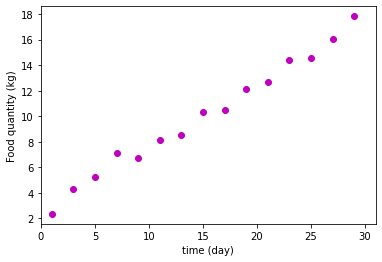

In [27]:
# Issue : Bought baby dinosorus and collect data of consumption
import numpy as np
import matplotlib.pyplot as plt
import PIL
import urllib
# url = 'https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.aliexpress.com%2Fitem%2F32968705823.html&psig=AOvVaw0pqMRRvLVeyhyWWDzAOGvA&ust=1651161904237000&source=images&cd=vfe&ved=0CAwQjRxqFwoTCLCCncvPtPcCFQAAAAAdAAAAABAD'
# url = 'https://www.google.com/url?sa=i&url=https%3A%2F%2Fth.pngtree.com%2Ffreepng%2Frare-animal-cute-dinosaur_4512502.html&psig=AOvVaw0pqMRRvLVeyhyWWDzAOGvA&ust=1651161904237000&source=images&cd=vfe&ved=0CAwQjRxqFwoTCLCCncvPtPcCFQAAAAAdAAAAABAJ'
# img = io.imread(url)
x = np.arange(1, 31, 2)

# noise = np.random.normal(0, 5, len(x))
noise = np.random.randn(len(x)) * .5
z = ( 2.5+x * .5) + noise 

# plt.subplot(211)
# plt.figure(figsize=(8,5))
plt.xlabel('time (day)')
plt.ylabel('Food quantity (kg)')
plt.scatter(x,z, c='m' )

plt.xlim(0, 31)
# plt.subplot(212)
# img = np.array(PIL.Image.open(urllib.request.urlopen(url)))
# plt.imshow(img)
plt.show()

In [15]:
# ((x * 5) + 3) * noise

array([ 10.99496576,   6.65209915,  30.45579718,   9.46008355,
        11.57415297,  56.81135734,  53.05204703,  17.8323409 ,
        80.88464795, -21.72904379,  35.37090094,  56.66325222,
       -26.19992973, -29.65944495,   4.58137183])

In [4]:
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

In [6]:
noise

array([-0.70836673, -0.40243333,  0.34244755, -0.25025981, -0.52032827,
       -0.90778289,  0.59496876, -0.19034022, -0.73638545,  0.69970987,
        0.21154169,  0.28262228,  0.79478267, -0.31932988, -0.17024964])

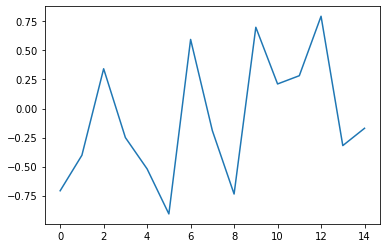

In [7]:
plt.plot(noise)

# $ \text{ Linear Regression :} \quad h = wx +b$
### this is only depends on 1 features
## $ h = w_1x_1 + w_2x_2 + b  $
## $ \text{ $x_1$ = food quantity,   $x_2$ = happiness}$ 

# How to find $w \:\& \: b$ with lowest ***Error***
- SSE 
- MSE

# SSE 
### $ \quad \begin{align}
    J = \sum_i(z_i-h_i)^2
    \end{align}$
J = sse, z = y_test, h = y_predict


In [254]:
# h = w*x + b
# sse = ((z-h)**2).sum()

# MSE 
### $ \quad \begin{align}
    K = \dfrac{ \sum_i^n(z_i-h_i)^2}{n}
    \end{align}$
K = sse, z = y_test, h = y_predict


# Relationship of $ w, b, J$

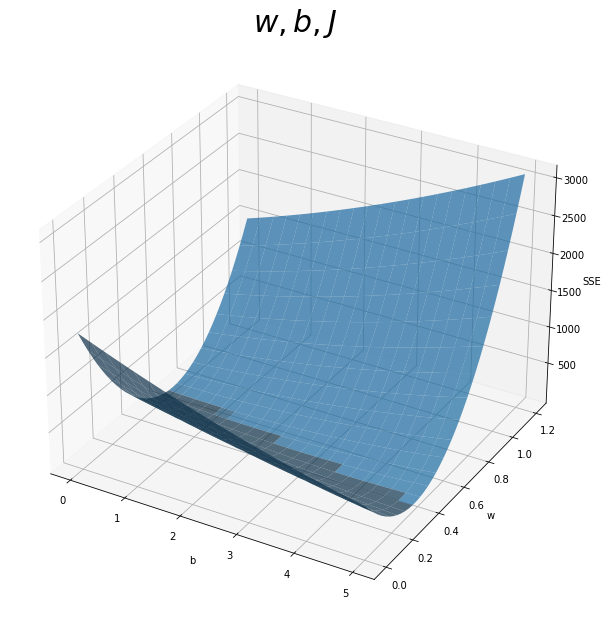

In [255]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(8,8))
ax = plt.axes([0,0,1,1], projection='3d',
             xlabel='b', ylabel='w', zlabel='SSE')

mb, mw = np.meshgrid(np.linspace(0, 5, 41),
                    np.linspace(0, 1.2, 41))
sse = ((x * mw.ravel()[:,None] + mb.ravel()[:, None] - z)**2).sum(1).reshape(41, -1)

# z-val = SSE ( heightness represents sse )
ax.plot_surface(mb, mw, sse, rstride=2, cstride=2, alpha=0.7)
plt.title('$w, b, J$', fontsize=30)

# ax.vlines(1, 0.2, 2)
# l = ax.axhline()
plt.show()

### Now we see we want $SSE_{min}$ at the Valley
by using Calculus II
# Zoom at valley of graph 
see slightly heightness of sse, see around :$ (b,w)=(2.5,0.5)$

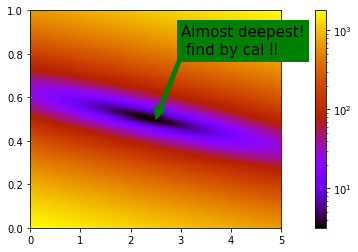

In [256]:
import matplotlib as mpl

mb, mw = np.meshgrid(np.linspace(0, 5, 201,), 
                    np.linspace(0, 1, 201))
sse = ((x*mw.ravel()[:,None]+mb.ravel()[:,None]-z)**2).sum(1).reshape(201,-1)

plt.axes(xlim=(0,5), ylim=(0,1))
plt.pcolormesh(mb, mw, sse, norm=mpl.colors.LogNorm(), cmap='gnuplot' )
plt.colorbar(pad=.1)

plt.annotate('Almost deepest!\n find by cal II', xy=(2.5,0.5), xytext=(3,0.8),
            arrowprops=dict(color='green', ), bbox=dict(color='g', 
                                                      ), fontsize=15, )
plt.show()

# Gradient Descent, GD
use to find lowest sse 
### Position is (x,y) = (b,w), Heightness is z=sse
### Equation of Partial differential is a bit tricky, let's skip it

In [257]:
eta = 0.0002 # learning rate
n_learns = 10000
w, b = 1.2, 0
w_i = [w]
b_i = [b]
h = w*x + b # initial equation
for i in range(n_learns):
    w += 2*((z-h) * x).sum() * eta # tricky partial differential
    b += 2*(z-h).sum() * eta
    w_i += [w] # equals w_i.append(w)
    b_i += [b]
    h = w*x + b
print(w) # finally show last_w
print(b)

0.5056044743281066
2.364210595477686


# Plot Linear model now by $ w, b $ that we have calculated 

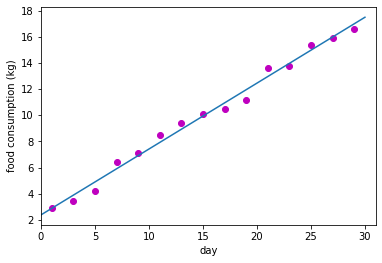

In [258]:
plt.axes(xlim=(0,31))
plt.scatter(x, z, c='m') # old data from very header of lab
plt.xlabel('day')
plt.ylabel('food consumption (kg)')

X_line = np.arange(0,31)
y_line = w * X_line + b


plt.plot(X_line, y_line)
plt.show()

# <b style='color:red'> Absolutely perfect !!
# Now visualize each time that machine learns

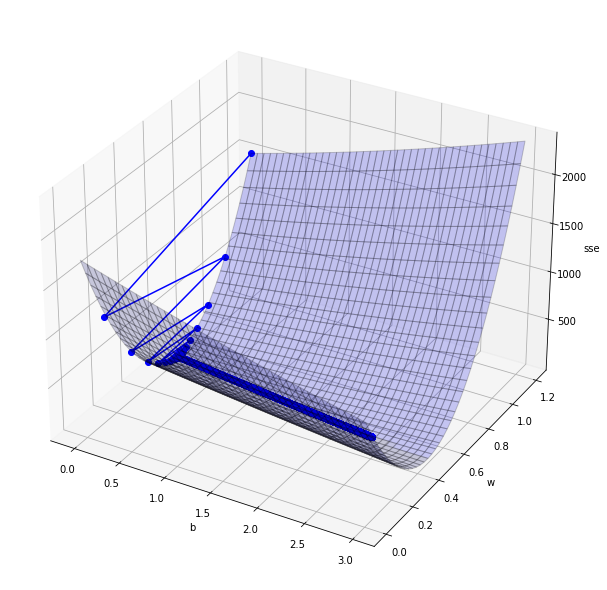

In [259]:
bi = np.array(b_i)
wi = np.array(w_i)

plt.figure(figsize=(8,8))
ax = plt.axes([0,0,1,1], projection='3d', xlabel='b',
        ylabel='w', zlabel='sse')
sse_i = ((x * wi[:, None] + bi[:, None] - z)**2).sum(1)
ax.plot(bi, wi, sse_i, 'bo-') # main : blue dots plot

mb, mw = np.meshgrid(np.linspace(0, 3, 201), 
                    np.linspace(0, 1.2, 201))
sse = ((x*mw.ravel()[:,None]+mb.ravel()[:,None]-z)**2).sum(1).reshape(201,-1)
ax.plot_surface(mb, mw, sse, rstride=5,
               cstride=5, alpha=0.2, color='b', edgecolor='k')


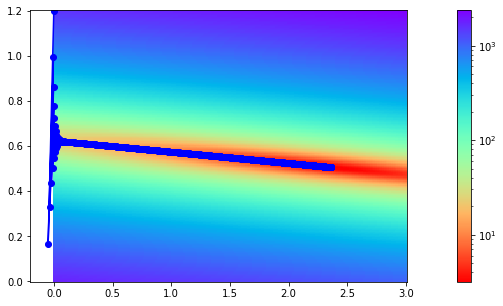

In [284]:
plt.figure(figsize=(9,5))
plt.pcolormesh(mb, mw, sse, norm=mpl.colors.LogNorm(), 
              cmap=plt.cm.rainbow_r)
plt.colorbar(pad=0.1)
plt.plot(bi, wi, 'bo-', )
plt.show()